In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Creating different Blobs

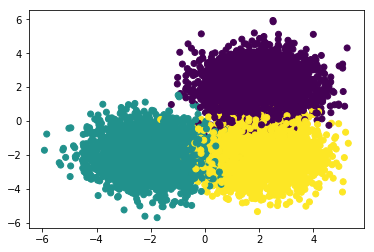

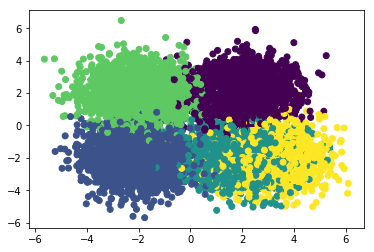

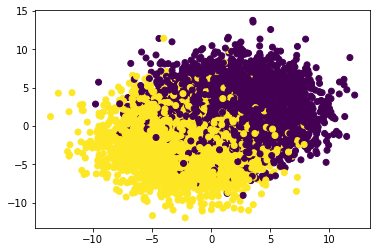

In [5]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

#3 blobs & 1 standard deviation

# The coordinates of the centers of our blobs.
centers_1 = [[2, 2], [-2, -2], [2, -2]]

# Make 10,000 rows worth of data with two features
X_1, y_1 = make_blobs(
    n_samples=10000,
    centers=centers_1,
    cluster_std=1,
    n_features=2,
    random_state=42)

#Divide into training and test sets.
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    X_1,
    y_1,
    test_size=0.9,
    random_state=42)

#5 blobs & 1 standard deviation

# The coordinates of the centers of our blobs.
centers_2 = [[2, 2], [-2, -2], [2, -2], [-2,2], [3,-2]]

# Make 10,000 rows worth of data with two features
X_2, y_2 = make_blobs(
    n_samples=10000,
    centers=centers_2,
    cluster_std=1,
    n_features=2,
    random_state=42)

#Divide into training and test sets.
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X_2,
    y_2,
    test_size=0.9,
    random_state=42)


#2 blobs & 3 standard deviation

# The coordinates of the centers of our blobs.
centers_3 = [[2, 2], [-2, -2]]

# Make 10,000 rows worth of data with two features
X_3, y_3 = make_blobs(
    n_samples=10000,
    centers=centers_3,
    cluster_std=3,
    n_features=2,
    random_state=42)

#Divide into training and test sets.
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(
    X_3,
    y_3,
    test_size=0.9,
    random_state=42)

plt.scatter(X_1[:, 0], X_1[:, 1], c=y_1)
plt.show()
plt.scatter(X_2[:, 0], X_2[:, 1], c=y_2)
plt.show()
plt.scatter(X_3[:, 0], X_3[:, 1], c=y_3)
plt.show()

In [43]:
#k-means
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

def k_mean_form(X, n_clusters_val, y):
# Normalize the data.
    X_norm = normalize(X)

# Reduce it to two components.
    X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
    y_pred = KMeans(n_clusters=n_clusters_val, random_state=42).fit_predict(X_pca)

# Plot the solution.
#    plt.scatter(X_pca[:,0], X_pca[:,1], c=y_pred)
#    plt.show()

# Check the solution against the data.
    print('Comparing k-means clusters against the data:')
    print(pd.crosstab(y_pred, y))

In [44]:
k_mean_form(X_train_1, 3, y_train_1)

Comparing k-means clusters against the data:
col_0    0    1    2
row_0               
0      352    1    7
1        0  310    8
2       10    9  303


In [45]:
k_mean_form(X_train_2, 5, y_train_2)

Comparing k-means clusters against the data:
col_0    0    1    2    3    4
row_0                         
0        6    5    0  177    0
1        9    0   75    0  135
2        0  189    6    4    1
3      206    0    1    6    0
4        0    9  109    0   62


In [46]:
k_mean_form(X_train_3, 2, y_train_3)

Comparing k-means clusters against the data:
col_0    0    1
row_0          
0      417  101
1       95  387


In [39]:
#Mean shift
from sklearn.cluster import MeanShift, estimate_bandwidth

def mean_shift_form(X_train, y_train):
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
    bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(X_train)

# Extract cluster assignments for each data point.
    labels = ms.labels_

# Coordinates of the cluster centers.
    cluster_centers = ms.cluster_centers_

# Count our clusters.
    n_clusters_ = len(np.unique(labels))

    print("Number of estimated clusters: {}".format(n_clusters_))

    plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
    plt.show()

    print('Comparing the assigned categories to the ones in the data:')
    print(pd.crosstab(y_train,labels))

Number of estimated clusters: 3


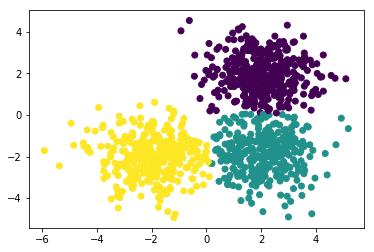

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      352   10    0
1        1    8  311
2        6  304    8


In [40]:
mean_shift_form(X_train_1, y_train_1)

Number of estimated clusters: 4


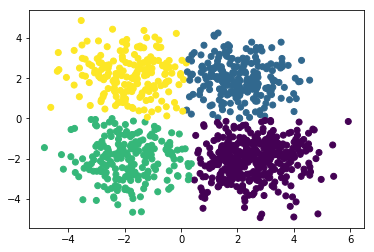

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0        2  211    0    8
1        3    0  195    5
2      176    2   12    1
3        0    6    4  177
4      193    4    1    0


In [41]:
mean_shift_form(X_train_2, y_train_2)

Number of estimated clusters: 1


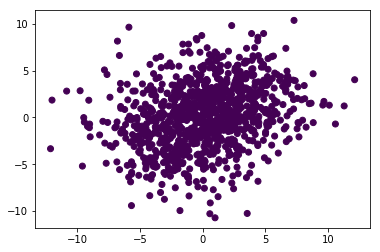

Comparing the assigned categories to the ones in the data:
col_0    0
row_0     
0      512
1      488


In [42]:
mean_shift_form(X_train_3, y_train_3)

In [48]:
#spectral clustering
from sklearn.cluster import SpectralClustering

def spectral_clust_form(n_clust, X_train, y_train):

# Declare and fit the model.
    sc = SpectralClustering(n_clusters=n_clust)
    sc.fit(X_train)

#Predicted clusters.
    predict=sc.fit_predict(X_train)

#Graph results.
    plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
    plt.show()

    print('Comparing the assigned categories to the ones in the data:')
    print(pd.crosstab(y_train,predict))

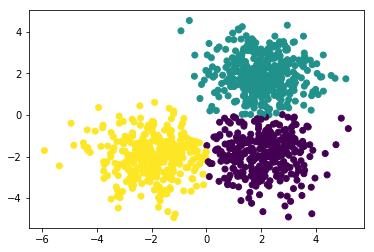

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0        5  357    0
1        9    1  310
2      306    7    5


In [50]:
spectral_clust_form(3, X_train_1, y_train_1)

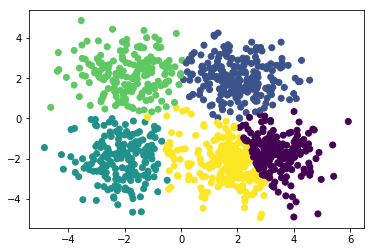

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0        1  211    0    6    3
1        0    0  176    4   23
2       56    1    3    0  131
3        0    6    4  175    2
4      136    1    0    0   61


In [51]:
spectral_clust_form(5, X_train_2, y_train_2)

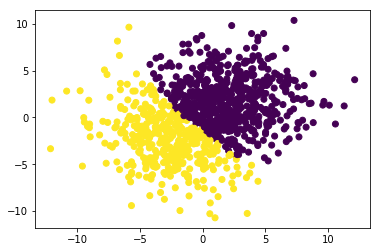

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      457   55
1      150  338


In [52]:
spectral_clust_form(2, X_train_3, y_train_3)

In [53]:
#affinity propagation
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

def aff_prop_form(X_train):

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
    af = AffinityPropagation().fit(X_train)
    print('Done')

# Pull the number of clusters and cluster assignments for each data point.
    cluster_centers_indices = af.cluster_centers_indices_
    n_clusters_ = len(cluster_centers_indices)
    labels = af.labels_

    print('Estimated number of clusters: {}'.format(n_clusters_))

    from itertools import cycle

    plt.figure(1)
    plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_clusters_), colors):
        class_members = labels == k
        cluster_center = X_train[cluster_centers_indices[k]]
        plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
        plt.plot(cluster_center[0],
                 cluster_center[1],
                 'o',
                 markerfacecolor=col,
                 markeredgecolor='k')
        for x in X_train[class_members]:
            plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

    plt.title('Estimated number of clusters: {}'.format(n_clusters_))
    plt.show()

Done
Estimated number of clusters: 93


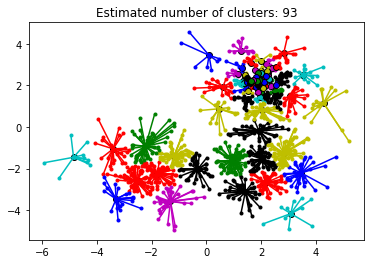

In [54]:
aff_prop_form(X_train_1)

Done
Estimated number of clusters: 23


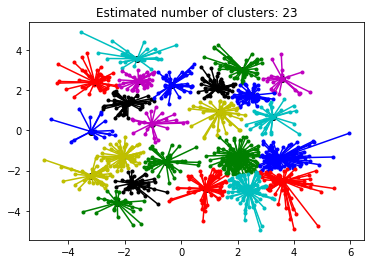

In [55]:
aff_prop_form(X_train_2)

Done
Estimated number of clusters: 39


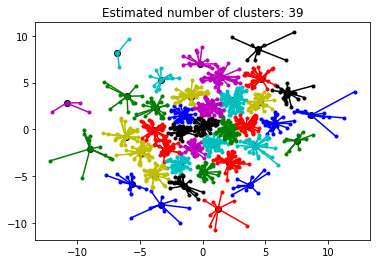

In [56]:
aff_prop_form(X_train_3)